In [2]:
import pandas as pd
import numpy as np

#from pandas as import Series
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf, pacf


import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams

#rcParams['figure.figsize'] = 15,6

from sklearn.metrics import mean_squared_error

In [3]:
df_airpassenger = pd.read_csv('AirPassengers.csv')

In [4]:
df_airpassenger.shape

(144, 2)

In [5]:
df_airpassenger.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [6]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')

data = pd.read_csv('AirPassengers.csv',
                  parse_dates= ['Month'],
                  index_col='Month',
                  date_parser= dateparse)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


In [7]:
data.shape

(144, 1)

In [8]:
data.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [9]:
type(data)

pandas.core.frame.DataFrame

In [10]:
ts = data['Passengers']

In [11]:
ts.head()

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: Passengers, dtype: int64

In [12]:
type(ts)

pandas.core.series.Series

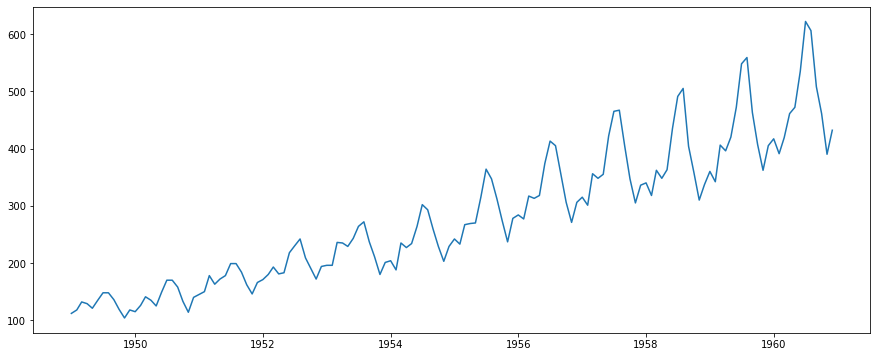

In [17]:
plt.plot(ts)

In [19]:
decomposition = seasonal_decompose(ts)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid


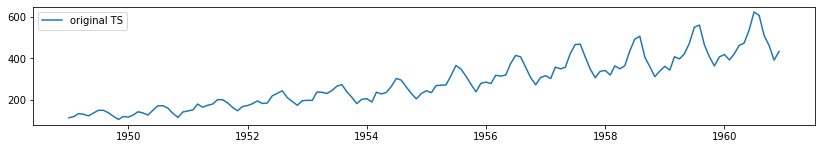

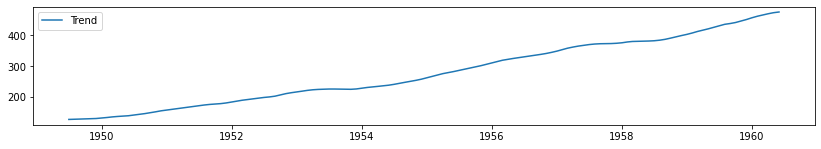

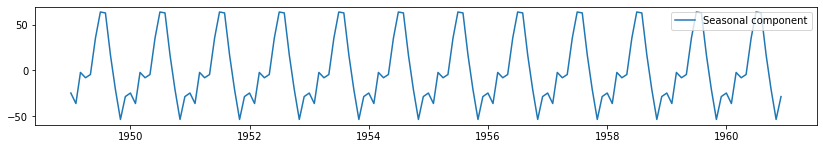

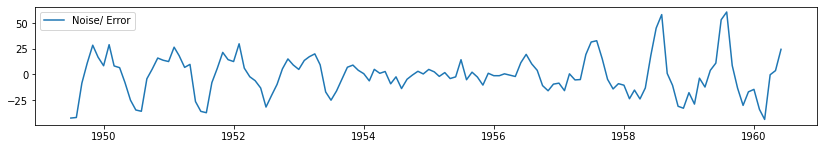

In [25]:
plt.figure(figsize=(14,10))
plt.subplot(411)
plt.plot(ts, label = 'original TS')
plt.legend(loc = 'best')

plt.figure(figsize=(14,10))
plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')

plt.figure(figsize=(14,10))
plt.subplot(413)
plt.plot(seasonal, label = 'Seasonal component')
plt.legend(loc = 'best')

plt.figure(figsize=(14,10))
plt.subplot(414)
plt.plot(residual, label = 'Noise/ Error')
plt.legend(loc = 'best')


In [30]:
rolmean = ts.rolling(window=6).mean()

In [31]:
rolmean

Month
1949-01-01           NaN
1949-02-01           NaN
1949-03-01           NaN
1949-04-01           NaN
1949-05-01           NaN
                 ...    
1960-08-01    519.166667
1960-09-01    534.000000
1960-10-01    534.000000
1960-11-01    520.333333
1960-12-01    503.166667
Name: Passengers, Length: 144, dtype: float64

In [33]:
dftest = adfuller(ts, autolag='AIC')
dftest

(0.8153688792060433,
 0.9918802434376409,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [61]:
def test_stationarity(timeseries):
    rolmean = timeseries.rolling(window=12).mean()
    
    plt.plot(timeseries, color = 'blue', label = 'original')
    plt.plot(rolmean, color = 'red', label = 'Moving Average')
    plt.legend(loc = 'best')
    plt.title('Original data and Moving Average')
    
    
    print('Result of Dicky Fuler test')
    dftest = adfuller(timeseries, autolag='AIC')
    dfout = pd.Series(dftest[0:4], index = ['Test statitics', 'p-value', '#Lags used', '# Observations used' ])
    
    
    for key, value in dftest[4].items():
        dfout['Critical value (%s)' %key] = value
    print(dfout)

Result of Dicky Fuler test
Test statitics            0.815369
p-value                   0.991880
#Lags used               13.000000
# Observations used     130.000000
Critical value (1%)      -3.481682
Critical value (5%)      -2.884042
Critical value (10%)     -2.578770
dtype: float64


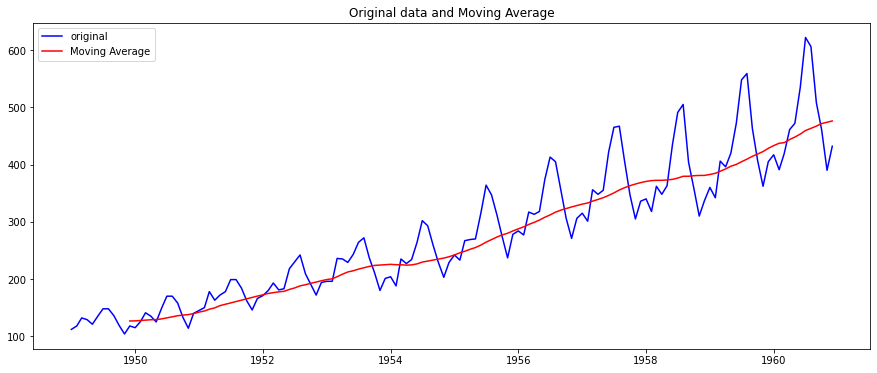

In [62]:
test_stationarity(ts)

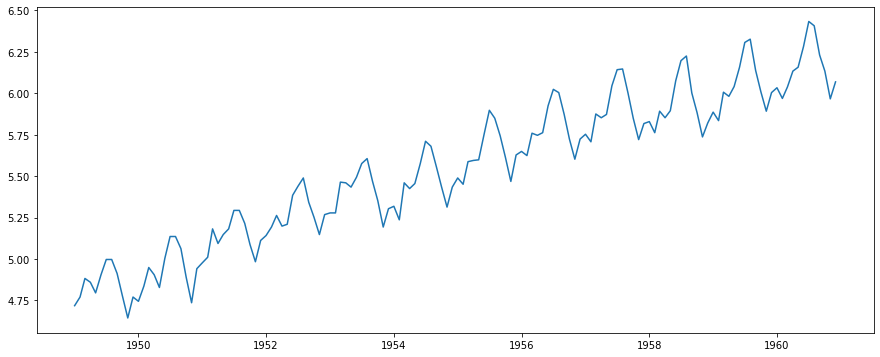

In [63]:
ts_log = np.log(ts)
plt.plot(ts_log)

Result of Dicky Fuler test
Test statitics           -1.717017
p-value                   0.422367
#Lags used               13.000000
# Observations used     130.000000
Critical value (1%)      -3.481682
Critical value (5%)      -2.884042
Critical value (10%)     -2.578770
dtype: float64


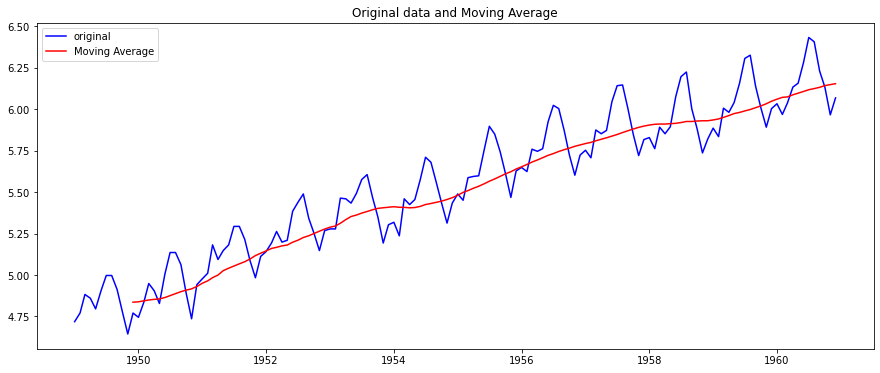

In [64]:
test_stationarity(ts_log)

In [65]:
dftest = adfuller(ts_log, autolag='AIC')
dftest

(-1.717017089106963,
 0.4223667747703902,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 -445.3990312497209)

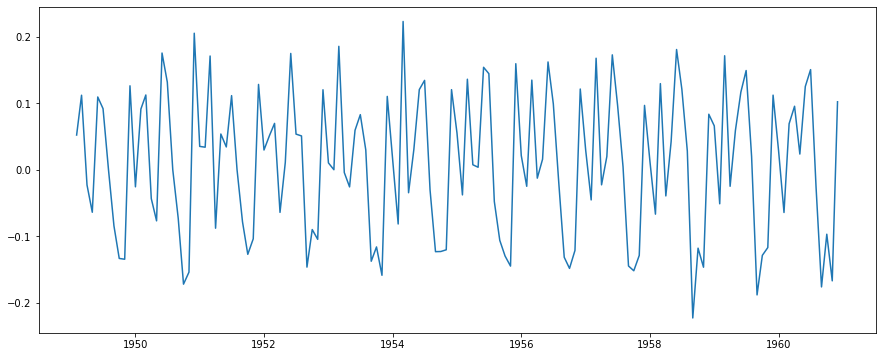

In [66]:
# differencing data.shift()

ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

In [67]:
ts_log_diff

Month
1949-01-01         NaN
1949-02-01    0.052186
1949-03-01    0.112117
1949-04-01   -0.022990
1949-05-01   -0.064022
                ...   
1960-08-01   -0.026060
1960-09-01   -0.176399
1960-10-01   -0.097083
1960-11-01   -0.167251
1960-12-01    0.102279
Name: Passengers, Length: 144, dtype: float64

In [68]:
ts_log_diff.dropna(inplace=True)

In [69]:
ts_log_diff

Month
1949-02-01    0.052186
1949-03-01    0.112117
1949-04-01   -0.022990
1949-05-01   -0.064022
1949-06-01    0.109484
                ...   
1960-08-01   -0.026060
1960-09-01   -0.176399
1960-10-01   -0.097083
1960-11-01   -0.167251
1960-12-01    0.102279
Name: Passengers, Length: 143, dtype: float64

Result of Dicky Fuler test
Test statitics           -2.717131
p-value                   0.071121
#Lags used               14.000000
# Observations used     128.000000
Critical value (1%)      -3.482501
Critical value (5%)      -2.884398
Critical value (10%)     -2.578960
dtype: float64


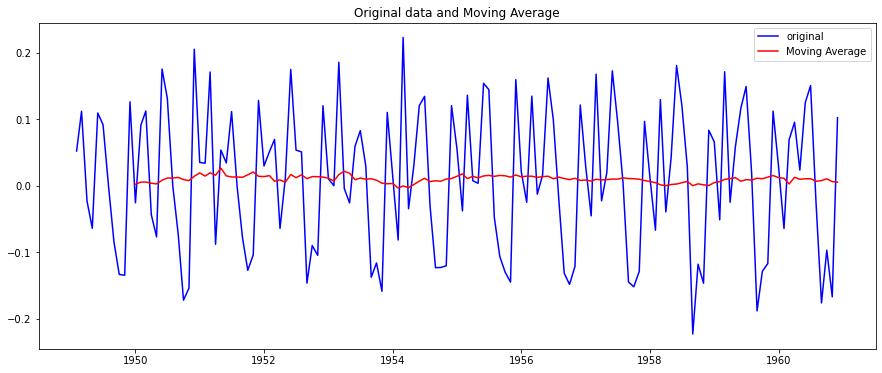

In [70]:
test_stationarity(ts_log_diff)

C:\Users\Sky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Text(0.5, 1.0, 'RSS: 0.543613')

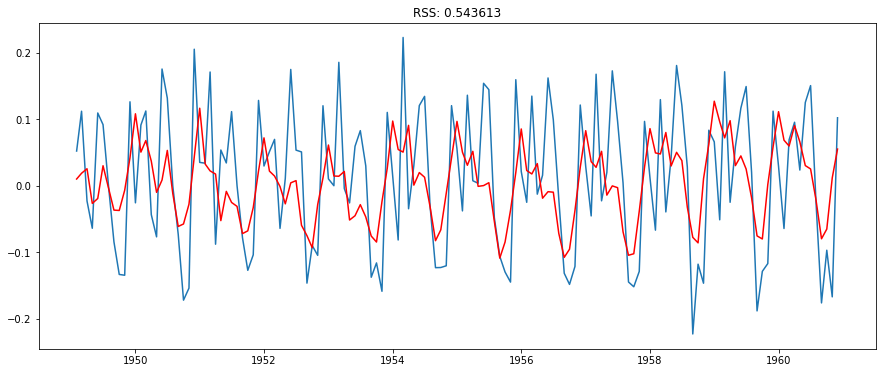

In [75]:
# p, d, q
model = ARIMA(ts_log, order=( 2, 1,1 ))

result = model.fit(disp = 1)
plt.plot(ts_log_diff)
plt.plot(result.fittedvalues, color = 'red')


plt.title('RSS: %4f' %sum(result.fittedvalues - ts_log_diff)**2)

Text(0.5, 1.0, 'RSS: 0.000014')

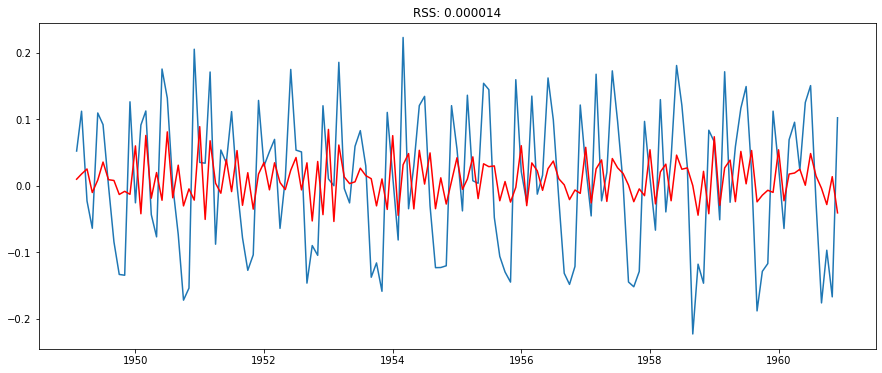

In [76]:
# p, d, q
model = ARIMA(ts_log, order=( 1, 1,1 ))

result = model.fit(disp = 1)
plt.plot(ts_log_diff)
plt.plot(result.fittedvalues, color = 'red')


plt.title('RSS: %4f' %sum(result.fittedvalues - ts_log_diff)**2)

Text(0.5, 1.0, 'RSS: 0.414108')

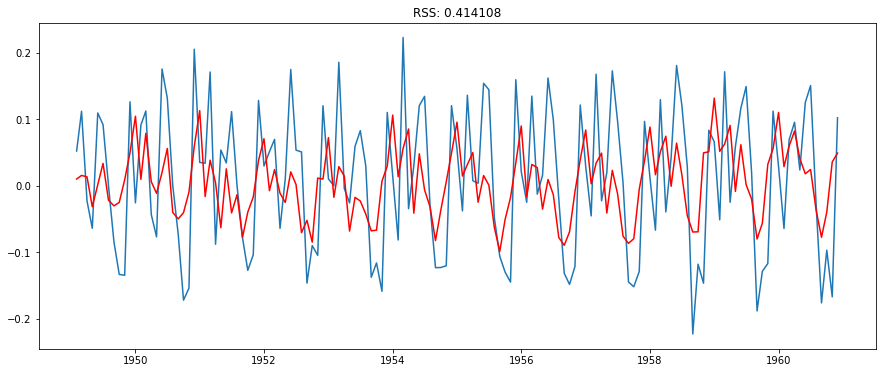

In [77]:
# p, d, q
model = ARIMA(ts_log, order=( 1, 1,2 ))

result = model.fit(disp = 1)
plt.plot(ts_log_diff)
plt.plot(result.fittedvalues, color = 'red')


plt.title('RSS: %4f' %sum(result.fittedvalues - ts_log_diff)**2)

Text(0.5, 1.0, 'RSS: 0.058461')

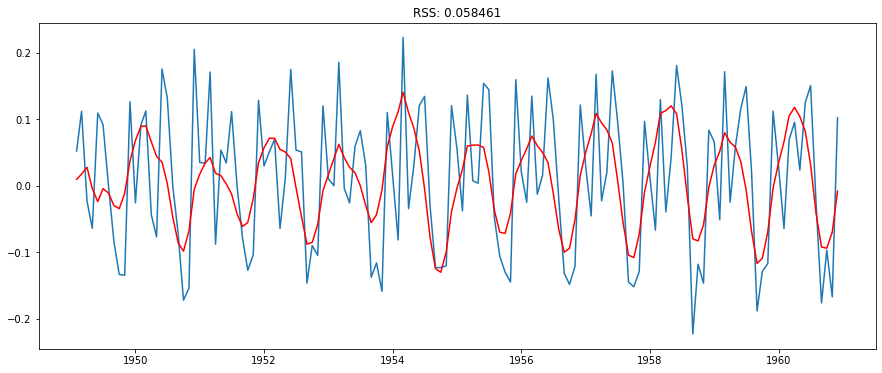

In [78]:
# p, d, q
model = ARIMA(ts_log, order=( 2, 1,2 ))

result = model.fit(disp = 1)
plt.plot(ts_log_diff)
plt.plot(result.fittedvalues, color = 'red')


plt.title('RSS: %4f' %sum(result.fittedvalues - ts_log_diff)**2)

Text(0.5, 1.0, 'RSS: 0.000014')

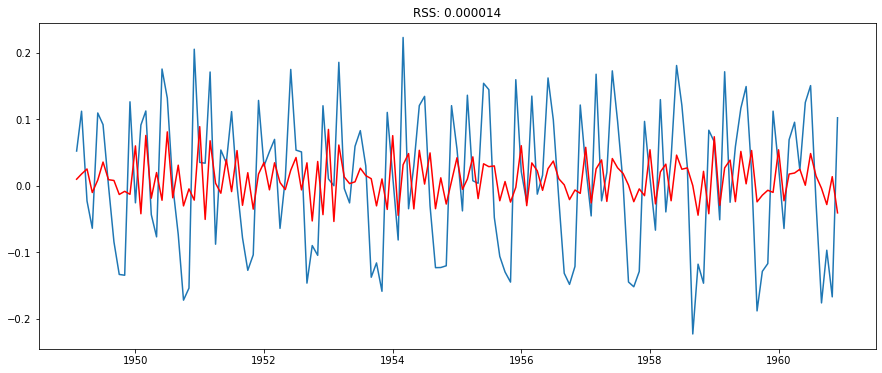

In [79]:
# p, d, q
model = ARIMA(ts_log, order=( 1, 1,1 ))

result_final = model.fit(disp = 1)
plt.plot(ts_log_diff)
plt.plot(result_final.fittedvalues, color = 'red')


plt.title('RSS: %4f' %sum(result_final.fittedvalues - ts_log_diff)**2)

In [ ]:
144+12 = 156

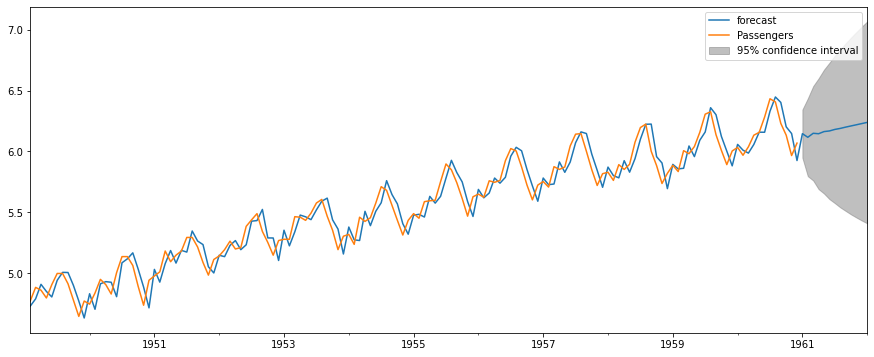

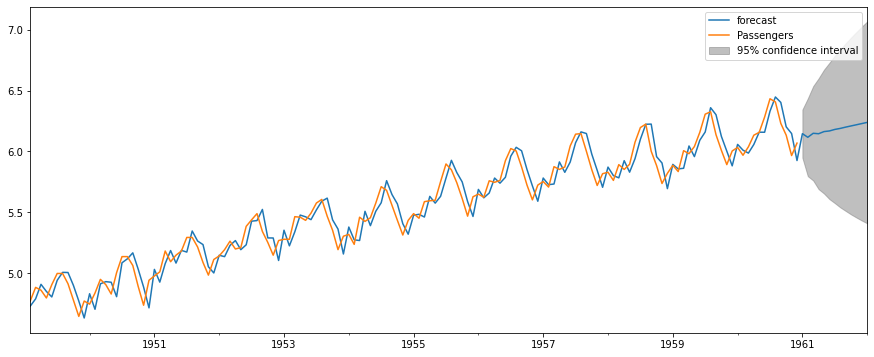

In [80]:
result_final.plot_predict(1,156)

In [81]:
forecasting = result_final.fittedvalues

In [82]:
forecasting

Month
1949-02-01    0.009800
1949-03-01    0.017618
1949-04-01    0.025229
1949-05-01   -0.010225
1949-06-01    0.008528
                ...   
1960-08-01    0.014654
1960-09-01   -0.003923
1960-10-01   -0.028363
1960-11-01    0.013642
1960-12-01   -0.040849
Length: 143, dtype: float64